In [3]:
import glob
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

In [24]:
class CustomDataset(Dataset):
    def __init__(self):
        self.imgs_path = "chest-xray/chest_xray/train/"
        file_list = glob.glob(self.imgs_path + "*")
        print(file_list)
        self.data = []
        for class_path in file_list:
            class_name = class_path.split("/")[-1]
            for img_path in glob.glob(class_path + "/*.jpeg"):
                self.data.append([img_path, class_name])
        print(self.data)
        self.class_map = {"PNEUMONIA" : 0, "NORMAL": 1}
        self.img_dim = (416, 416)
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        img_path, class_name = self.data[idx]
        img = cv2.imread(img_path)
        img = cv2.resize(img, self.img_dim)
        # class_id = self.class_map[class_name]
        img_tensor = torch.from_numpy(img)
        img_tensor = img_tensor.permute(2, 0, 1)
        # class_id = torch.tensor([class_id])
        return img_tensor

In [25]:
if __name__ == "__main__":
    dataset = CustomDataset()
    data_loader = DataLoader(dataset, batch_size=4, shuffle=True)
    # dataset[0]

['chest-xray/chest_xray/train\\NORMAL', 'chest-xray/chest_xray/train\\PNEUMONIA']
[['chest-xray/chest_xray/train\\NORMAL\\IM-0115-0001.jpeg', 'train\\NORMAL'], ['chest-xray/chest_xray/train\\NORMAL\\IM-0117-0001.jpeg', 'train\\NORMAL'], ['chest-xray/chest_xray/train\\NORMAL\\IM-0119-0001.jpeg', 'train\\NORMAL'], ['chest-xray/chest_xray/train\\NORMAL\\IM-0122-0001.jpeg', 'train\\NORMAL'], ['chest-xray/chest_xray/train\\NORMAL\\IM-0125-0001.jpeg', 'train\\NORMAL'], ['chest-xray/chest_xray/train\\NORMAL\\IM-0127-0001.jpeg', 'train\\NORMAL'], ['chest-xray/chest_xray/train\\NORMAL\\IM-0128-0001.jpeg', 'train\\NORMAL'], ['chest-xray/chest_xray/train\\NORMAL\\IM-0129-0001.jpeg', 'train\\NORMAL'], ['chest-xray/chest_xray/train\\NORMAL\\IM-0131-0001.jpeg', 'train\\NORMAL'], ['chest-xray/chest_xray/train\\NORMAL\\IM-0133-0001.jpeg', 'train\\NORMAL'], ['chest-xray/chest_xray/train\\NORMAL\\IM-0135-0001.jpeg', 'train\\NORMAL'], ['chest-xray/chest_xray/train\\NORMAL\\IM-0137-0001.jpeg', 'train\\NOR

In [26]:
# dataset = CustomDataset()

In [27]:
data_loader = DataLoader(dataset, batch_size=4, shuffle=True)

In [28]:
data_loader

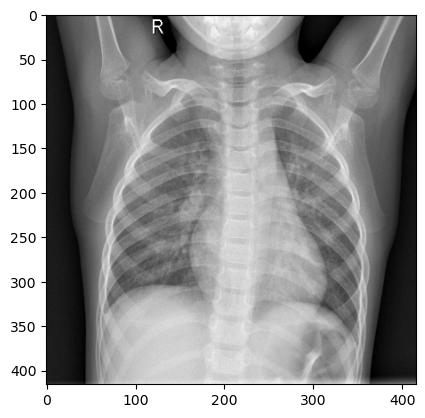

In [31]:
import matplotlib.pyplot as plt
img = dataset[0]
plt.imshow(img.permute((1, 2, 0)))

In [5]:
imgs_path = "chest-xray/chest_xray/train/"
file_list = glob.glob(imgs_path + "*")
print(file_list)

['chest-xray/chest_xray/train\\NORMAL', 'chest-xray/chest_xray/train\\PNEUMONIA']
